# Install

In [1]:
pip install --upgrade torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00


# Import + load


In [12]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, models, Model, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten

from tensorflow.keras.utils import to_categorical
from torch.nn import Sequential

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

In [3]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# train_images = tf.keras.utils.to_categorical(train_images)
# test_images = tf.keras.utils.to_categorical(test_images)

# Dataset

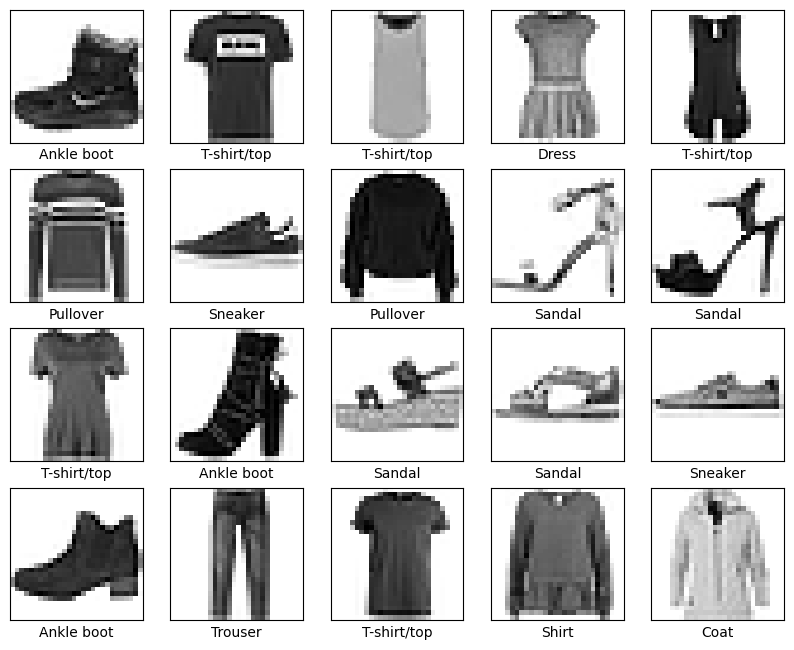

In [11]:
# Створення списку міток класів для використання при відображенні
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n_to_plot = 20

plt.figure(figsize=(10,10))
for i in range(n_to_plot):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Model

# **Part 1**

In [60]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Згортковий шар з 32 фільтрами
    # layers.MaxPooling2D((1, 1)),  # Пулінговий шар

    # layers.Conv2D(32, (3, 3), activation='relu', use_bias=False),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами
    layers.MaxPooling2D((2, 2)),  # Пулінговий шар

    layers.Conv2D(64, (3, 3), activation='relu'),  # Згортковий шар з 64 фільтрами

    layers.Flatten(),  # Вирівнювання вихідних даних
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар з 128 нейронами
    layers.Dense(64, activation='relu'),  # Повнозв'язний шар з 64 нейронами
    layers.Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами (класи)
])

print(model_cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [61]:
from sklearn.model_selection import StratifiedKFold
num_folds = 3
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)


# Компіляція моделі
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-2)
model_cnn.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
                  metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Навчання моделі
for fold, (train_indices, val_indices) in enumerate(kfold.split(train_images, train_labels)):
    train_images_fold, train_labels_fold = train_images[train_indices], train_labels[train_indices]
    val_images_fold, val_labels_fold = train_images[val_indices], train_labels[val_indices]

    history_fold = model_cnn.fit(train_images_fold, train_labels_fold,
                                  epochs=10,
                                  batch_size=64,
                                  verbose=1,
                                  validation_data=(val_images_fold, val_labels_fold),
                                  callbacks=[checkpoint])


Epoch 1/10
619/625 [============================>.] - ETA: 0s - loss: 0.5874 - accuracy: 0.7801
Epoch 1: val_accuracy improved from -inf to 0.84645, saving model to best_model.h5
625/625 [==============================] - 7s 6ms/step - loss: 0.5859 - accuracy: 0.7807 - val_loss: 0.4145 - val_accuracy: 0.8464
Epoch 2/10
 23/625 [>.............................] - ETA: 2s - loss: 0.3773 - accuracy: 0.8526

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


617/625 [============================>.] - ETA: 0s - loss: 0.3621 - accuracy: 0.8679
Epoch 2: val_accuracy improved from 0.84645 to 0.87915, saving model to best_model.h5
625/625 [==============================] - 4s 6ms/step - loss: 0.3613 - accuracy: 0.8681 - val_loss: 0.3310 - val_accuracy: 0.8791
Epoch 3/10
618/625 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.8882
Epoch 3: val_accuracy improved from 0.87915 to 0.88675, saving model to best_model.h5
625/625 [==============================] - 5s 8ms/step - loss: 0.3048 - accuracy: 0.8881 - val_loss: 0.3102 - val_accuracy: 0.8867
Epoch 4/10
616/625 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8978
Epoch 4: val_accuracy improved from 0.88675 to 0.89115, saving model to best_model.h5
625/625 [==============================] - 4s 7ms/step - loss: 0.2759 - accuracy: 0.8979 - val_loss: 0.3024 - val_accuracy: 0.8911
Epoch 5/10
623/625 [============================>.] - ETA: 0s - loss: 0.

In [62]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc_cnn)

313/313 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.9001
Точність на тестових даних: 0.9000999927520752


In [63]:
train_loss_cnn, train_acc_cnn = model_cnn.evaluate(train_images, train_labels)
print('Точність на тренувальних даних:', train_acc_cnn)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9647
Точність на тренувальних даних: 0.964733362197876


In [64]:
def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Learning Curves')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train_accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    plt.show()

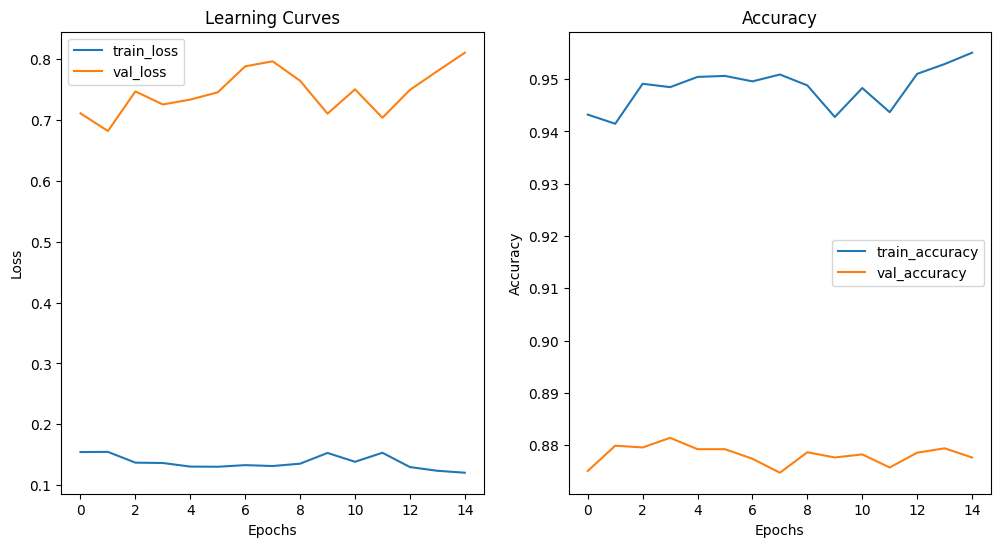

In [65]:
plot_curves(history_cnn)

1/1 [==============================] - 0s 143ms/step


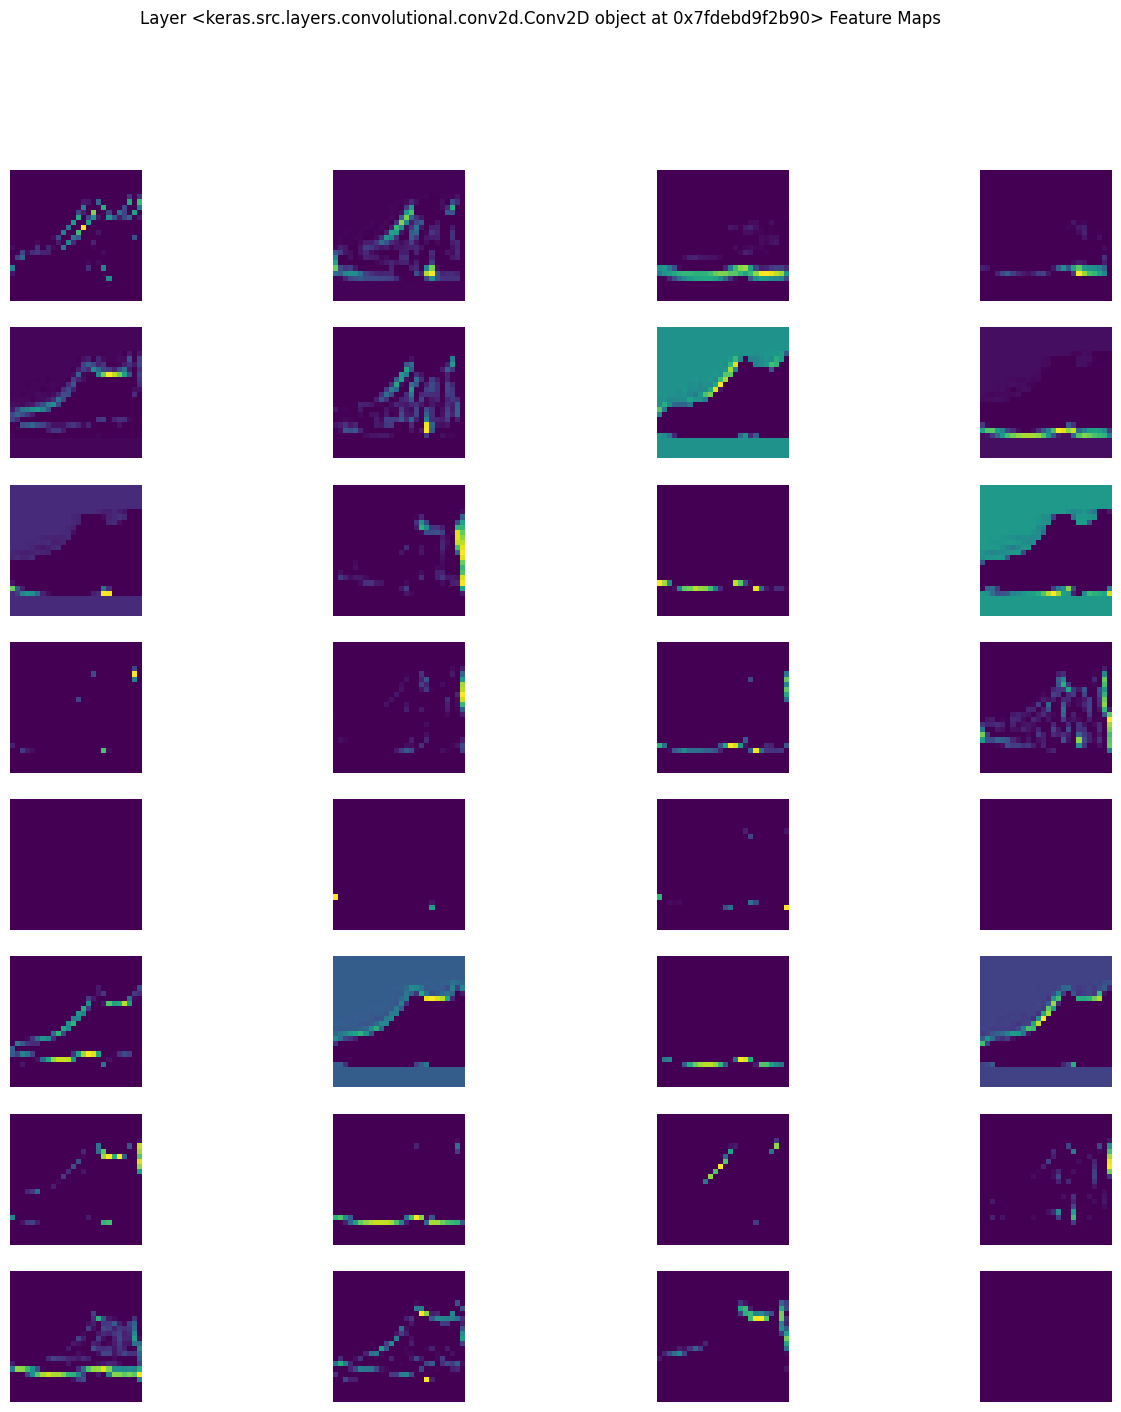

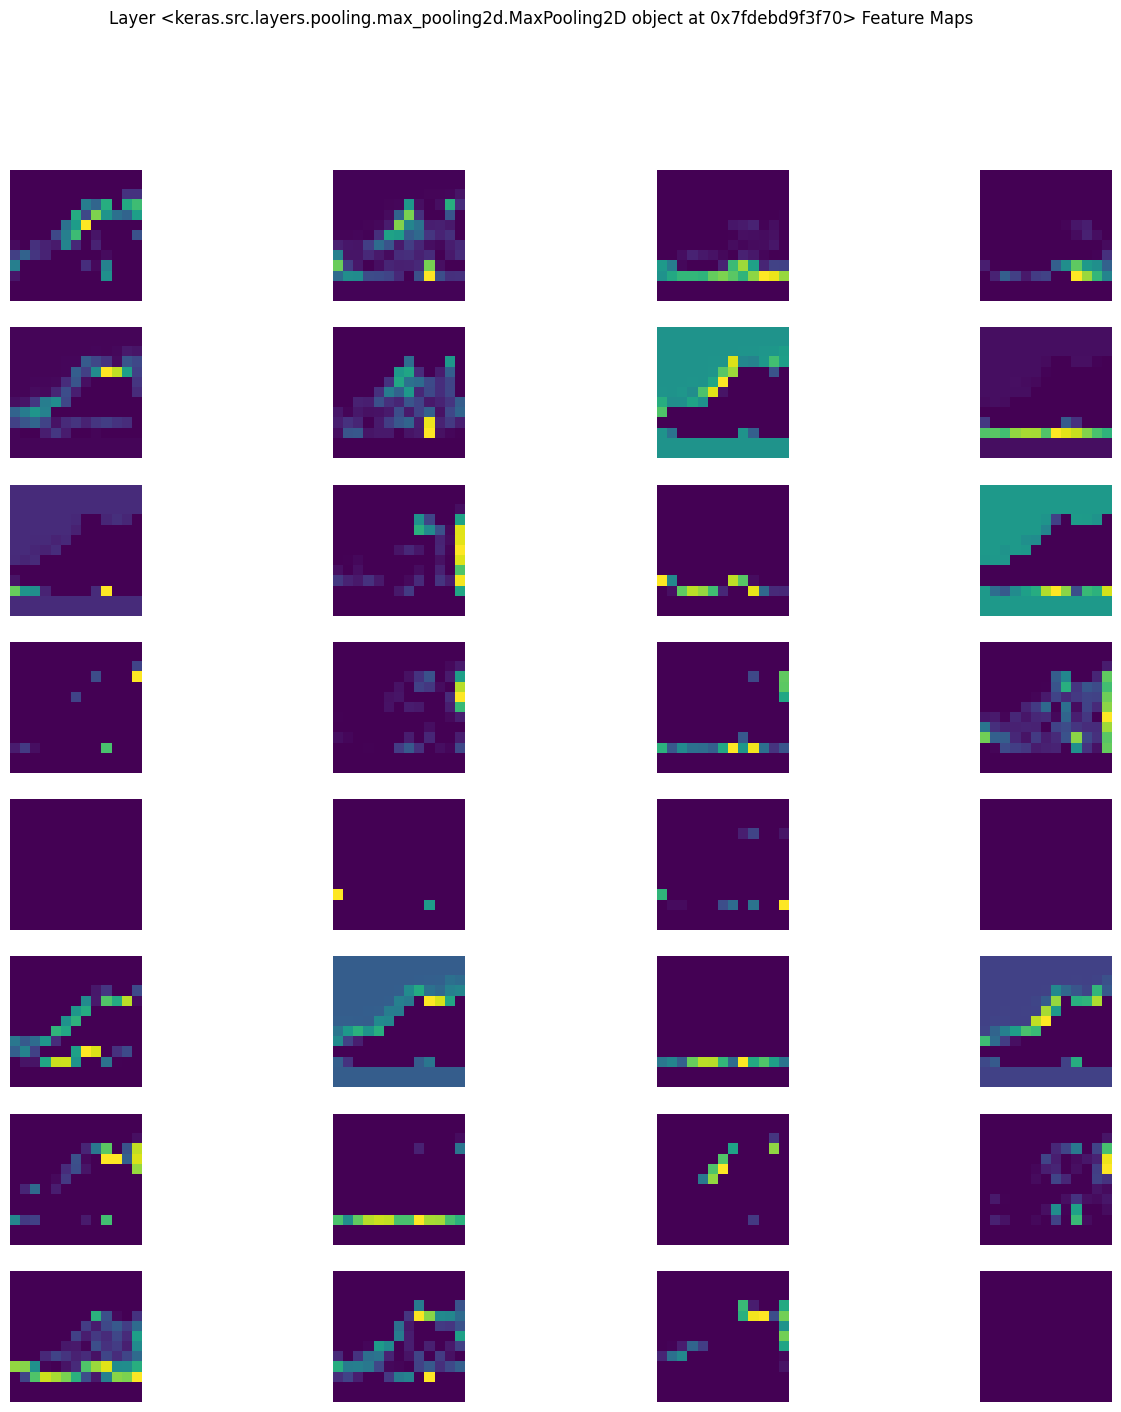

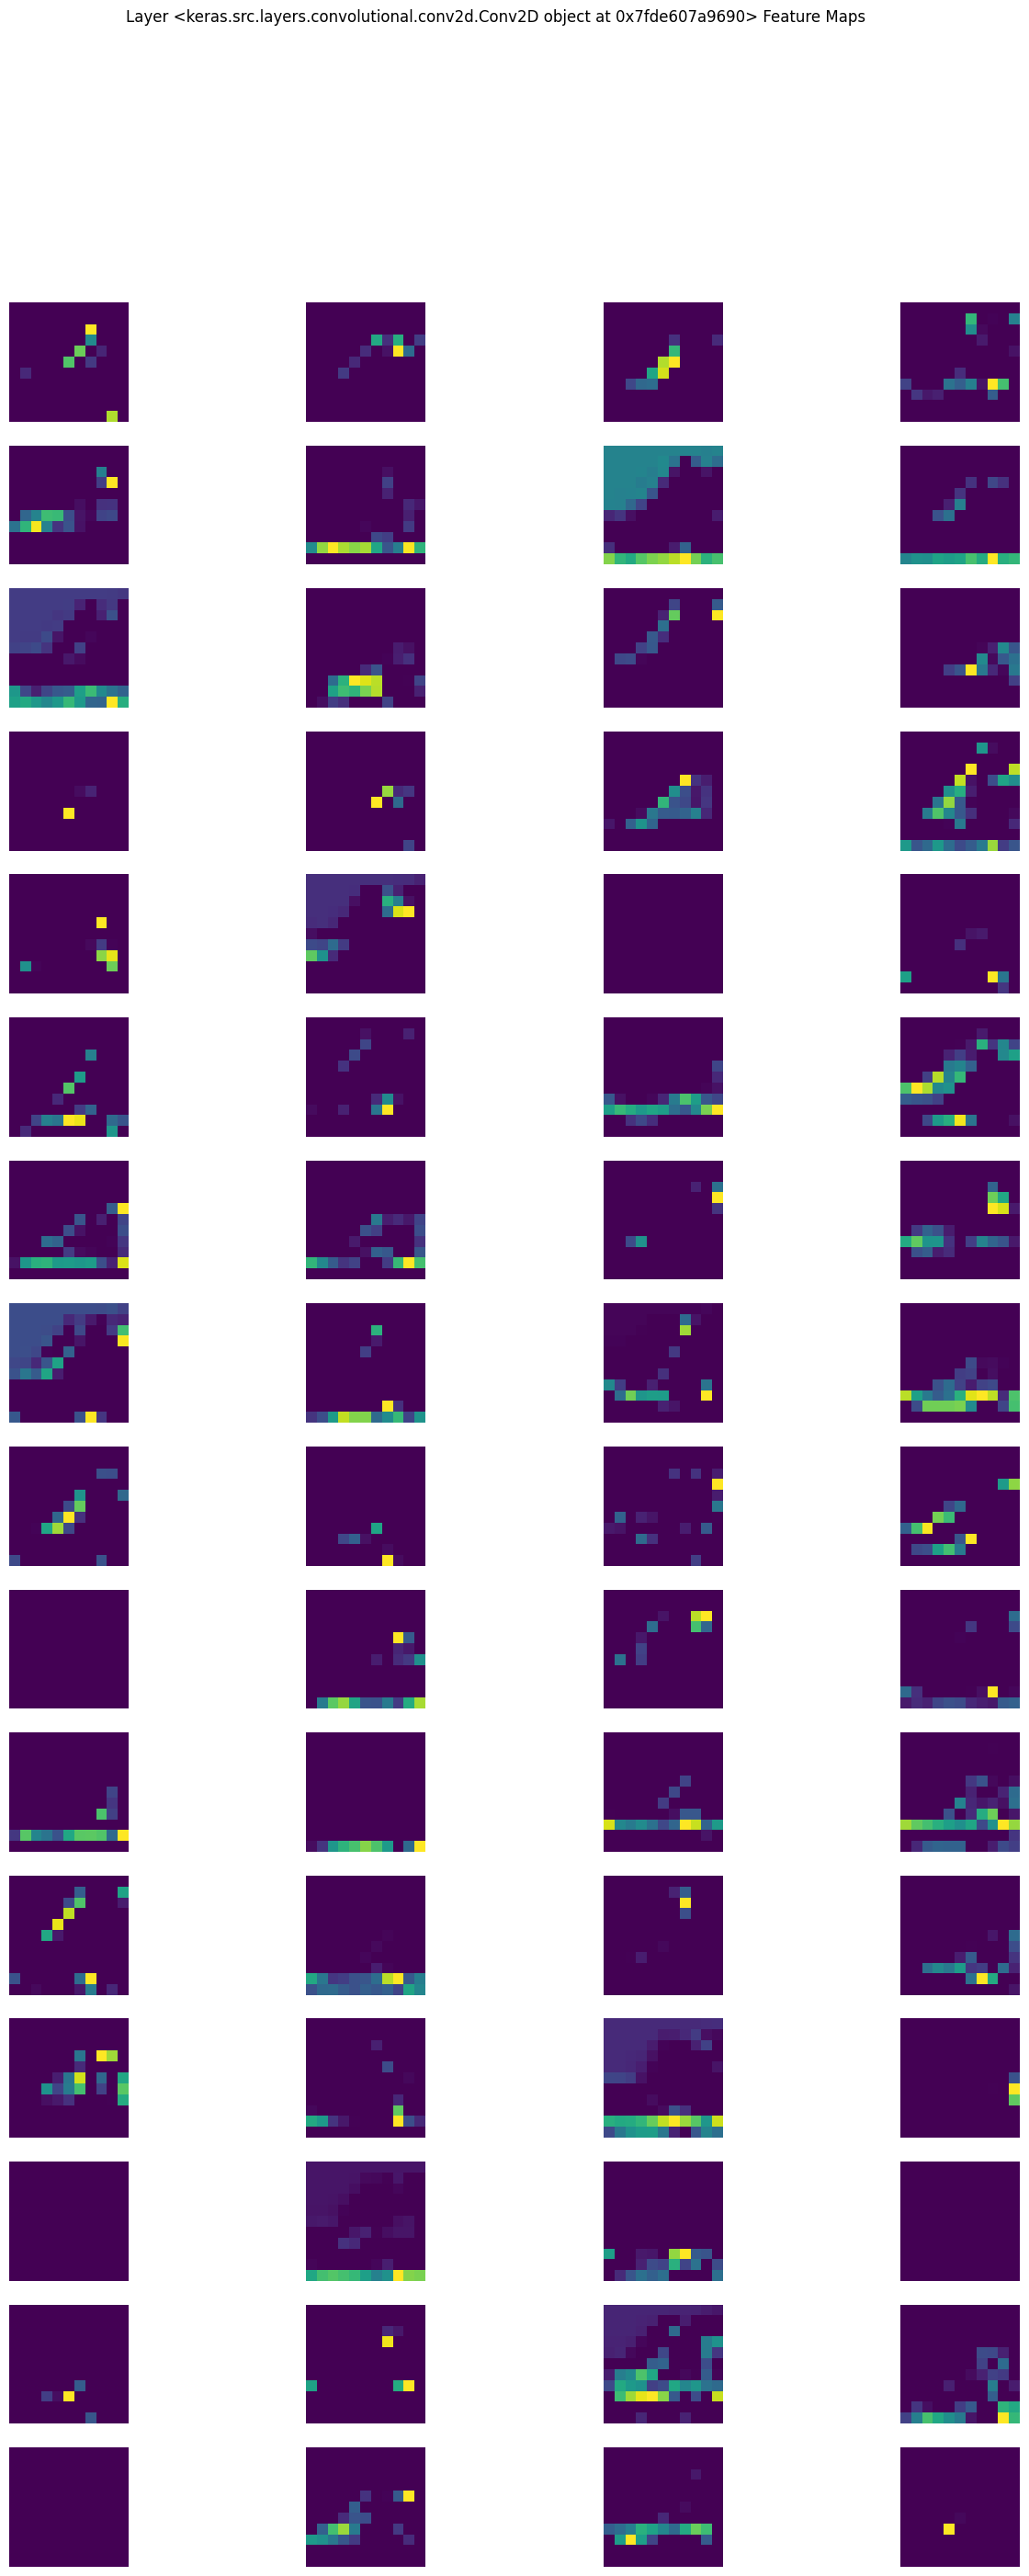

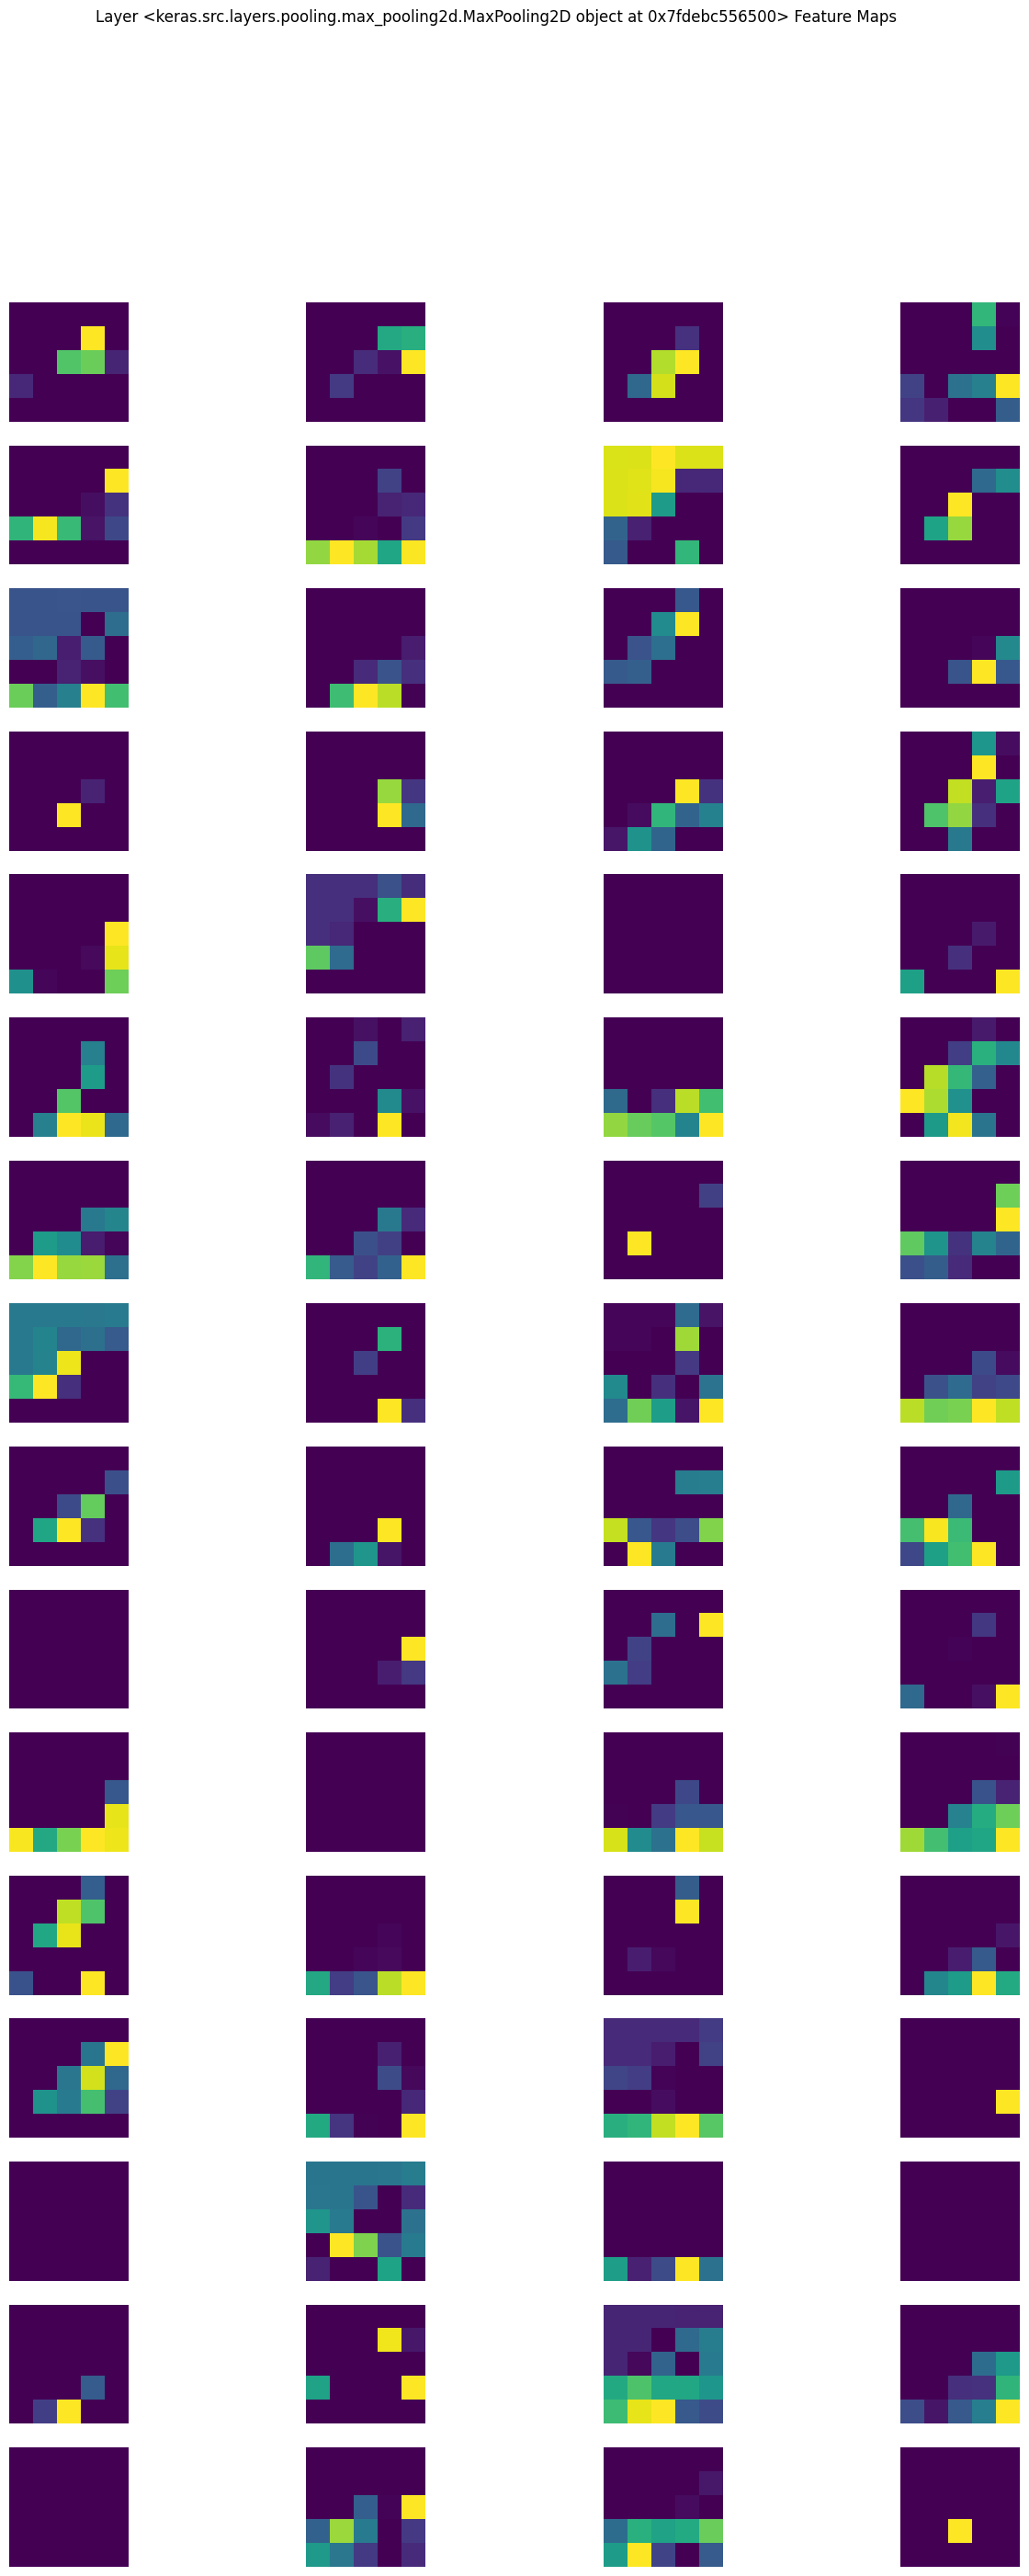

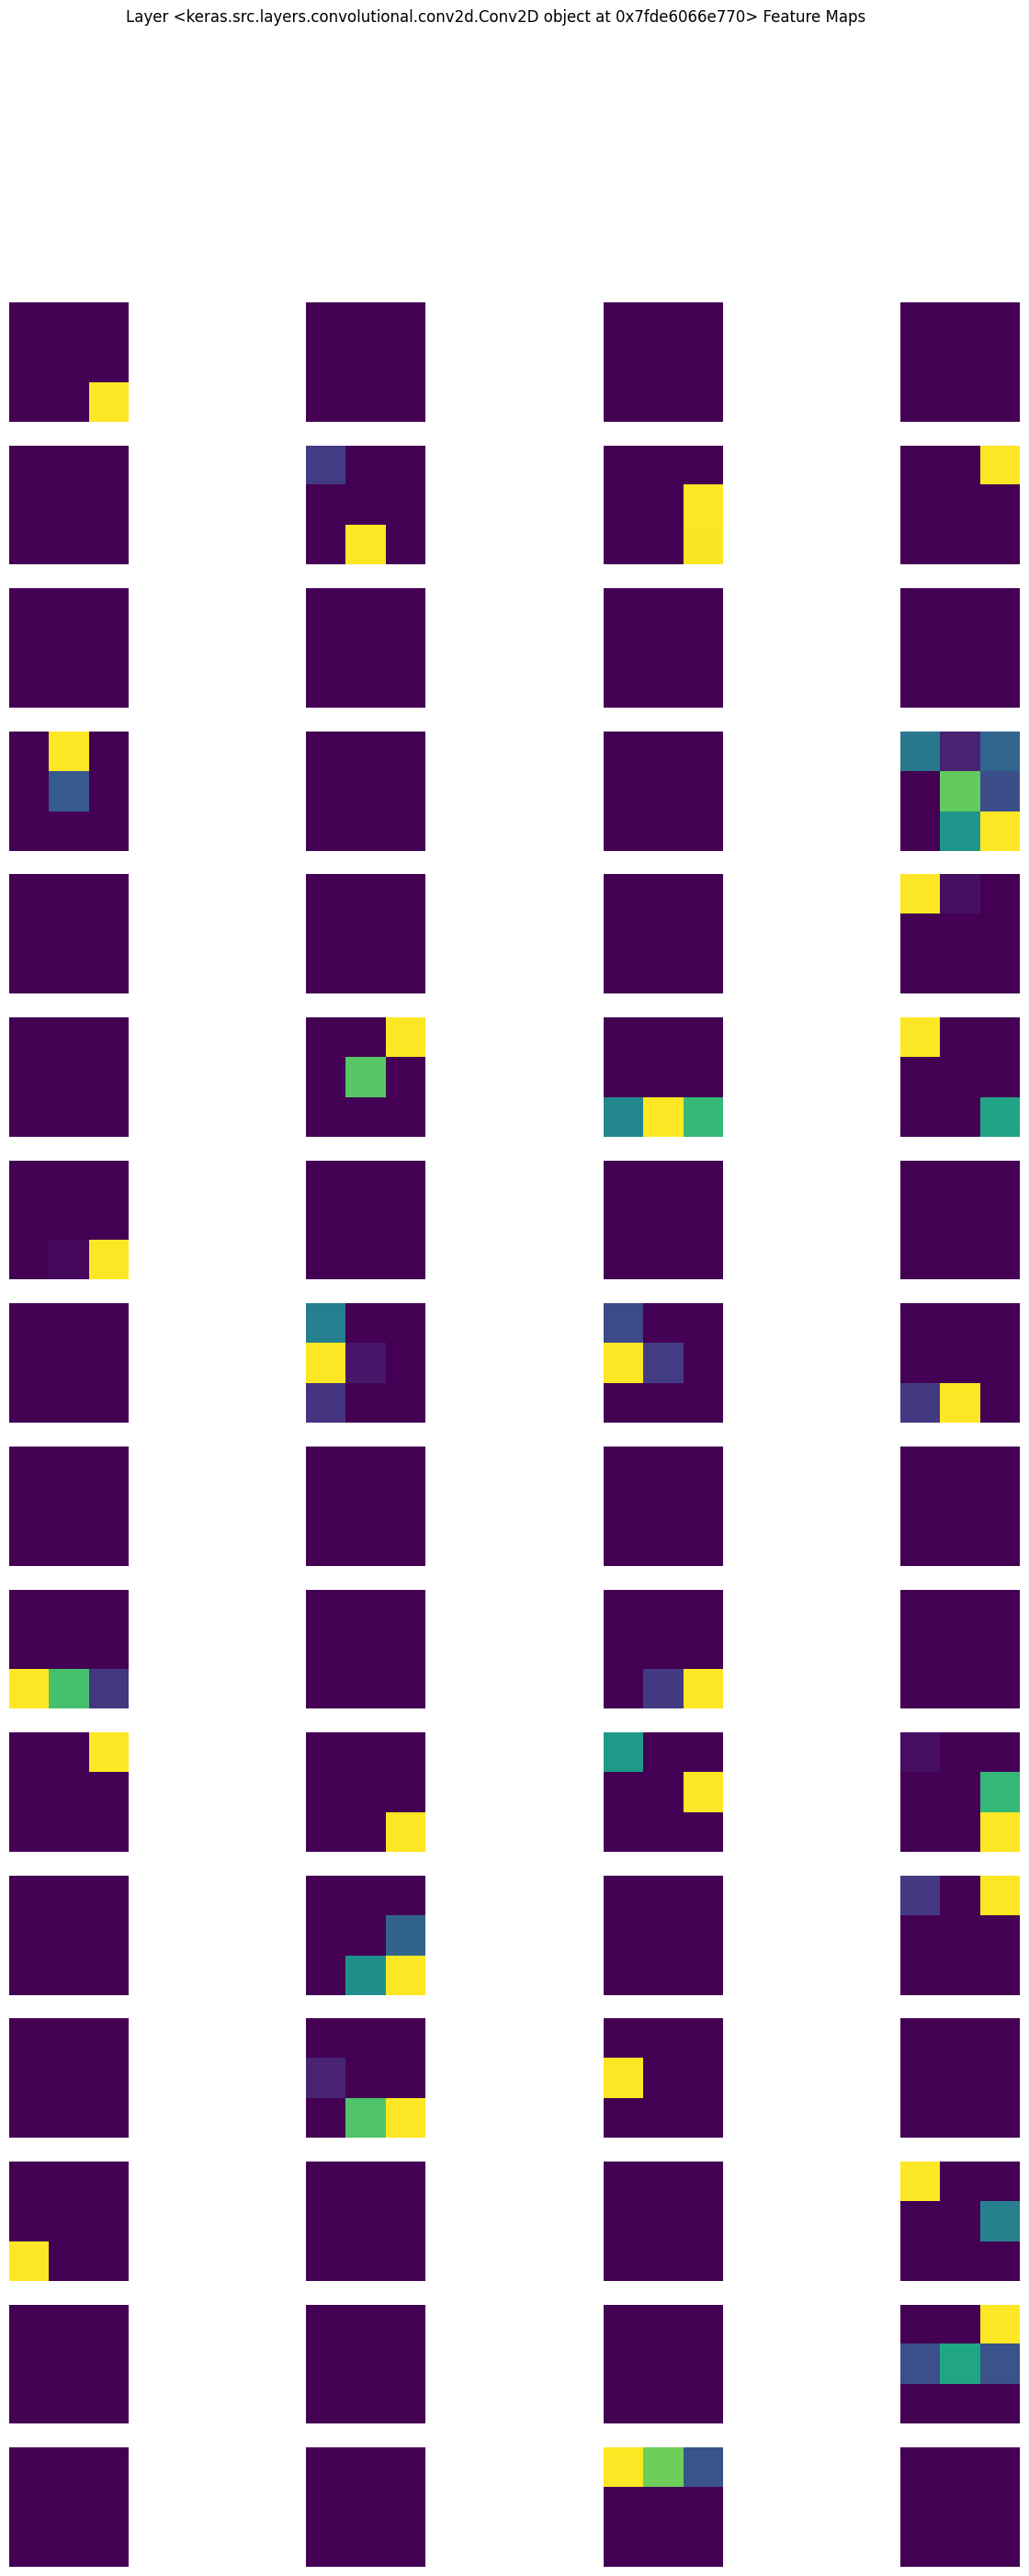

In [66]:
# Передача вхідного зображення через модель та отримання feature maps для кожного шару
activation_model = Model(inputs=model_cnn.input,
                         outputs=[layer.output for layer in model_cnn.layers])
activations = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

# Візуалізація feature maps для кожного шару
for layer_index, layer_activation in enumerate(activations):
    if len(layer_activation.shape) == 4:  # Якщо це згортковий шар
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        rows = num_features // 4  # 4 - менше фільтрів
        cols = 4

        plt.figure(figsize=(16, 2 * rows))
        for i in range(num_features):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Layer {activation_model.layers[layer_index+1]} Feature Maps')
        plt.show()

# VGG16
# **Part 2_1**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import categorical_crossentropy


from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np


In [5]:

# Завантаження базової моделі VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Замороження ваг моделі VGG16, щоб не навчати їх знову
base_model.trainable = False

# Розширення розмірності вхідних зображень та додання одного каналу
train_images_expanded = np.expand_dims(train_images, axis=-1)
test_images_expanded = np.expand_dims(test_images, axis=-1)

# Зміна розміру зображень та конвертація до кольорового формату
resized_train_images = np.array([img_to_array(array_to_img(image).resize((48, 48)).convert('RGB')) for image in train_images_expanded])
resized_test_images = np.array([img_to_array(array_to_img(image).resize((48, 48)).convert('RGB')) for image in test_images_expanded])

# Виведення інформації про базову модель
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [6]:
# Додавання нового повнозв'язного шару
flatten_layer = layers.Flatten()(base_model.output)
output_layer = layers.Dense(10, activation='softmax')(flatten_layer)

# Створення нової моделі
model_vg = models.Model(inputs=base_model.input, outputs=output_layer)


sgd = SGD(learning_rate=0.05)
train_labels_one_hot = to_categorical(train_labels, num_classes=10)

# Компіляція та навчання моделі з використанням one-hot енкодингу
model_vg.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

history_vg = model_vg.fit(resized_train_images, train_labels_one_hot,
                          epochs=10,
                          batch_size=512,
                          verbose=1,
                          validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 30s 231ms/step - loss: 34.3738 - accuracy: 0.6889 - val_loss: 13.9809 - val_accuracy: 0.7607
Epoch 2/10
94/94 [==============================] - 16s 169ms/step - loss: 21.4976 - accuracy: 0.7540 - val_loss: 20.7769 - val_accuracy: 0.7497
Epoch 3/10
94/94 [==============================] - 16s 171ms/step - loss: 21.9916 - accuracy: 0.7613 - val_loss: 22.8600 - val_accuracy: 0.7493
Epoch 4/10
94/94 [==============================] - 16s 172ms/step - loss: 21.0458 - accuracy: 0.7692 - val_loss: 15.7451 - val_accuracy: 0.7809
Epoch 5/10
94/94 [==============================] - 14s 150ms/step - loss: 18.8784 - accuracy: 0.7755 - val_loss: 35.6234 - val_accuracy: 0.7772
Epoch 6/10
94/94 [==============================] - 14s 152ms/step - loss: 18.4990 - accuracy: 0.7807 - val_loss: 15.8207 - val_accuracy: 0.7703
Epoch 7/10
94/94 [==============================] - 17s 178ms/step - loss: 19.4414 - accuracy: 0.7766 - val_loss: 17.7518 - val_ac

In [10]:
# model_vg = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# model_vg.summary()

In [7]:
# Виведення архітектури моделі після змін
model_vg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [8]:

# Перегляд та налаштування для доналаштування певних шарів VGG16
set_trainable = False
for layer in model_vg.layers:
    if layer.name == "block4_conv1":
        layer.trainable = True
    else:
        layer.trainable = False

**Не вистачає ОЗУ для проведеня донавчання**

In [9]:
# Компіляція моделі після змін
model_vg.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=2e-3),
                  metrics=['accuracy'])

# Тренування моделі
history = model_vg.fit(resized_train_images, train_labels_one_hot,
                      epochs=10,
                      batch_size=256,
                      validation_data=(resized_test_images,
                                       to_categorical(test_labels, num_classes=10)))

Epoch 1/10
235/235 [==============================] - 33s 114ms/step - loss: 8.2892 - accuracy: 0.5545 - val_loss: 3.0198 - val_accuracy: 0.5914
Epoch 2/10
235/235 [==============================] - 22s 95ms/step - loss: 0.8326 - accuracy: 0.7762 - val_loss: 1.3308 - val_accuracy: 0.7271
Epoch 3/10
235/235 [==============================] - 22s 95ms/step - loss: 0.5359 - accuracy: 0.8411 - val_loss: 0.6522 - val_accuracy: 0.8121
Epoch 4/10
235/235 [==============================] - 22s 95ms/step - loss: 0.4372 - accuracy: 0.8682 - val_loss: 0.3911 - val_accuracy: 0.8646
Epoch 5/10
235/235 [==============================] - 22s 96ms/step - loss: 0.3491 - accuracy: 0.8878 - val_loss: 0.5132 - val_accuracy: 0.8515
Epoch 6/10
235/235 [==============================] - 23s 96ms/step - loss: 0.3037 - accuracy: 0.8999 - val_loss: 0.3274 - val_accuracy: 0.8986
Epoch 7/10
235/235 [==============================] - 22s 95ms/step - loss: 0.2678 - accuracy: 0.9102 - val_loss: 0.3987 - val_accuracy

In [10]:
model_vg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

# VGG16

Part 2_2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.models import Model

In [ ]:

def vgg16(input_shape):
    input_tensor=Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_tensor)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    print(x.shape)
    # Block 2
    x =Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x =Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x =MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)
    print(x.shape)
    # Block 3
    x =Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x =Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x =Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x =MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)
    print(x.shape)
    # Block 4
    x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x =MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    print(x.shape)
    # # Block 5
    # x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    # x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    # x =Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    # x =MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)
    # print(x.shape)

    # Classification block
    x =Flatten(name='flatten')(x)

    x =Dense(4096, activation='relu', name='fc1')(x)
    x =Dense(4096, activation='relu', name='fc2')(x)

    x =Dropout(0.5)(x)
    x =Dense(10, activation='softmax', name='predictions')(x)
    model = Model(inputs=input_tensor, outputs=x, name='VGG16')
    return model

model = vgg16(input_shape =(28, 28, 1))

model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()
x_train =x_train/255
x_test =x_test/255
x_train, x_validate, y_train, y_validate =train_test_split(x_train, y_train, test_size=0.2, random_state=0)
x_train =x_train.reshape(x_train.shape[0], 28, 28, 1)
x_validate =x_validate.reshape(x_validate.shape[0], 28, 28, 1)
x_test =x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)


print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))
print ('y_train shape: {}' + str(y_train.shape))
print ('y_test shape:{}' + str(y_test.shape))

model.fit(x_train, y_train, epochs =10, batch_size =512)

preds =model.evaluate(x_test, y_test)
print ('Loss =' + str(preds[0]))
print ('Test Accuracy =' + str(preds[1]))

(None, 14, 14, 64)
(None, 7, 7, 128)
(None, 3, 3, 256)
(None, 1, 1, 512)


4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)
y_train shape: {}(48000, 10)
y_test shape:{}(10000, 10)
Epoch 1/10
94/94 [==============================] - 1848s 19s/step - loss: 1.6937 - accuracy: 0.3164
Epoch 2/10
94/94 [==============================] - 1827s 19s/step - loss: 0.6450 - accuracy: 0.7533
Epoch 3/10
94/94 [==============================] - 1821s 19s/step - loss: 0.4196 - accuracy: 0.8465
Epoch 4/10
94/94 [==============================] - 1819s 19s/step - loss: 0.3230 - accuracy: 0.8831
Epoch 5/10
94/94 [==============================] - 1809s 19s/step - loss: 0.2739 - accuracy: 0.9010
Epoch 6/10
94/94 [==============================] - 1812s 19s/step - loss: 0.2465 - accuracy: 0.9106
Epoch 7/10
94/94 [==============================] - 1820s 19s/step - loss: 0.2237 - accuracy: 0.9194
Epoch 8/10
94/94 [==============================] - 1812s 19s/step - l

In [ ]:
# model.save_weights('model_weights.h5')

In [ ]:
# from keras.models import model_from_json

# with open('model.json', 'r') as json_file:
#   loaded_model_json = json_file.read()

# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights('model_weights.h5')

# # Скомпілювати завантажену модель ще раз
# loaded_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Висновки

**Загальний висновок**

З завданнями класифікації зображень CNN надає кращі результати.
Але для простих завдань FNN є достатньо ефективним варіантом.

**Fully Connected Neural Network (FNN):**

Переваги:

    Простота в реалізації;
    Досить хороші результати на простих завданнях;
    Висока швидкість тренування, особливо з невеликим набором даних.

Недоліки:

    Не враховує просторову структуру зображень. Може бути причиною незадовільної класифікації зображень;
    З ростом кількості параметрів має схильність до перенавчання.

**Convolutional Neural Network (CNN):**

Переваги:

    Враховує просторові залежності в зображеннях за допомогою згорткових шарів;
    Може ефективно працювати з обмеженими наборами даних. Збільшення тренувальних даних, донавчання окремих шарів;
    Зменшення кількості параметрів за рахунок визначення ознак, що  забезпечує більш ефективне навчання.

Недоліки:

    Порівняно з FNN, CNN має складнішу архітектуру.
    Тренування CNN вимагає більше обчислювальних ресурсів, особливо для складних архітектур та великих обсягів даних.

**Спостереження**

    для FNN  великий batch_size краще узагальнення, проте також може призвести до перенавчання

    для CNN  більший batch_size призводить до кращої ефективності. малий - до нестабільного навчання

    регуляризатори - На параметрах по замовчуванню модель краща.

    найбільший вплив на мережу складає додавання згорткового та пулінгового шару до обробки
